In [167]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [168]:
# Load the data
df = pd.read_csv('./HackathonData/CAD/SpeciesCAD_train.csv')

In [169]:
# Remove the label column
dfS = df
dfS = dfS.drop('label', axis=1)
dfS = dfS.drop('sample_ID', axis=1)

In [170]:
dfS = dfS.loc[:, (dfS != 0).any(axis=0)]

In [171]:
# Standardize the data
dfS = (dfS - dfS.mean())
dfS
covmatrix = dfS.cov()
#plt.figure(figsize=(20,20))
#sns.heatmap(covmatrix, vmax=1, square=True, annot=True)
#plt.title('Correlation matrix')
covmatrix
eig_values, eig_vectors = np.linalg.eig(covmatrix)
indizes = eig_values.argsort()
eig_vectors
explained_variance=(np.flip(eig_values[indizes]) / np.sum(eig_values))*100
#plt.figure()
#plt.bar(range(37), explained_variance, alpha=0.6)
#plt.ylabel('Percentage of explained variance')
#plt.xlabel('Dimensions')
# Scores
V = dfS.dot(covmatrix)
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(dfS) # normalizing the features
x

array([[-0.05618529, -0.0418487 , -0.0418487 , ..., -0.0418487 ,
        -0.0418487 , -0.0418487 ],
       [-0.05618529, -0.0418487 , -0.0418487 , ..., -0.0418487 ,
        -0.0418487 , -0.0418487 ],
       [-0.05618529, -0.0418487 , -0.0418487 , ..., -0.0418487 ,
        -0.0418487 , -0.0418487 ],
       ...,
       [-0.05618529, -0.0418487 , -0.0418487 , ..., -0.0418487 ,
        -0.0418487 , -0.0418487 ],
       [-0.05618529, -0.0418487 , -0.0418487 , ..., -0.0418487 ,
        -0.0418487 , -0.0418487 ],
       [-0.05618529, -0.0418487 , -0.0418487 , ..., -0.0418487 ,
        -0.0418487 , -0.0418487 ]])

In [172]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(dfS) # normalizing the features
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

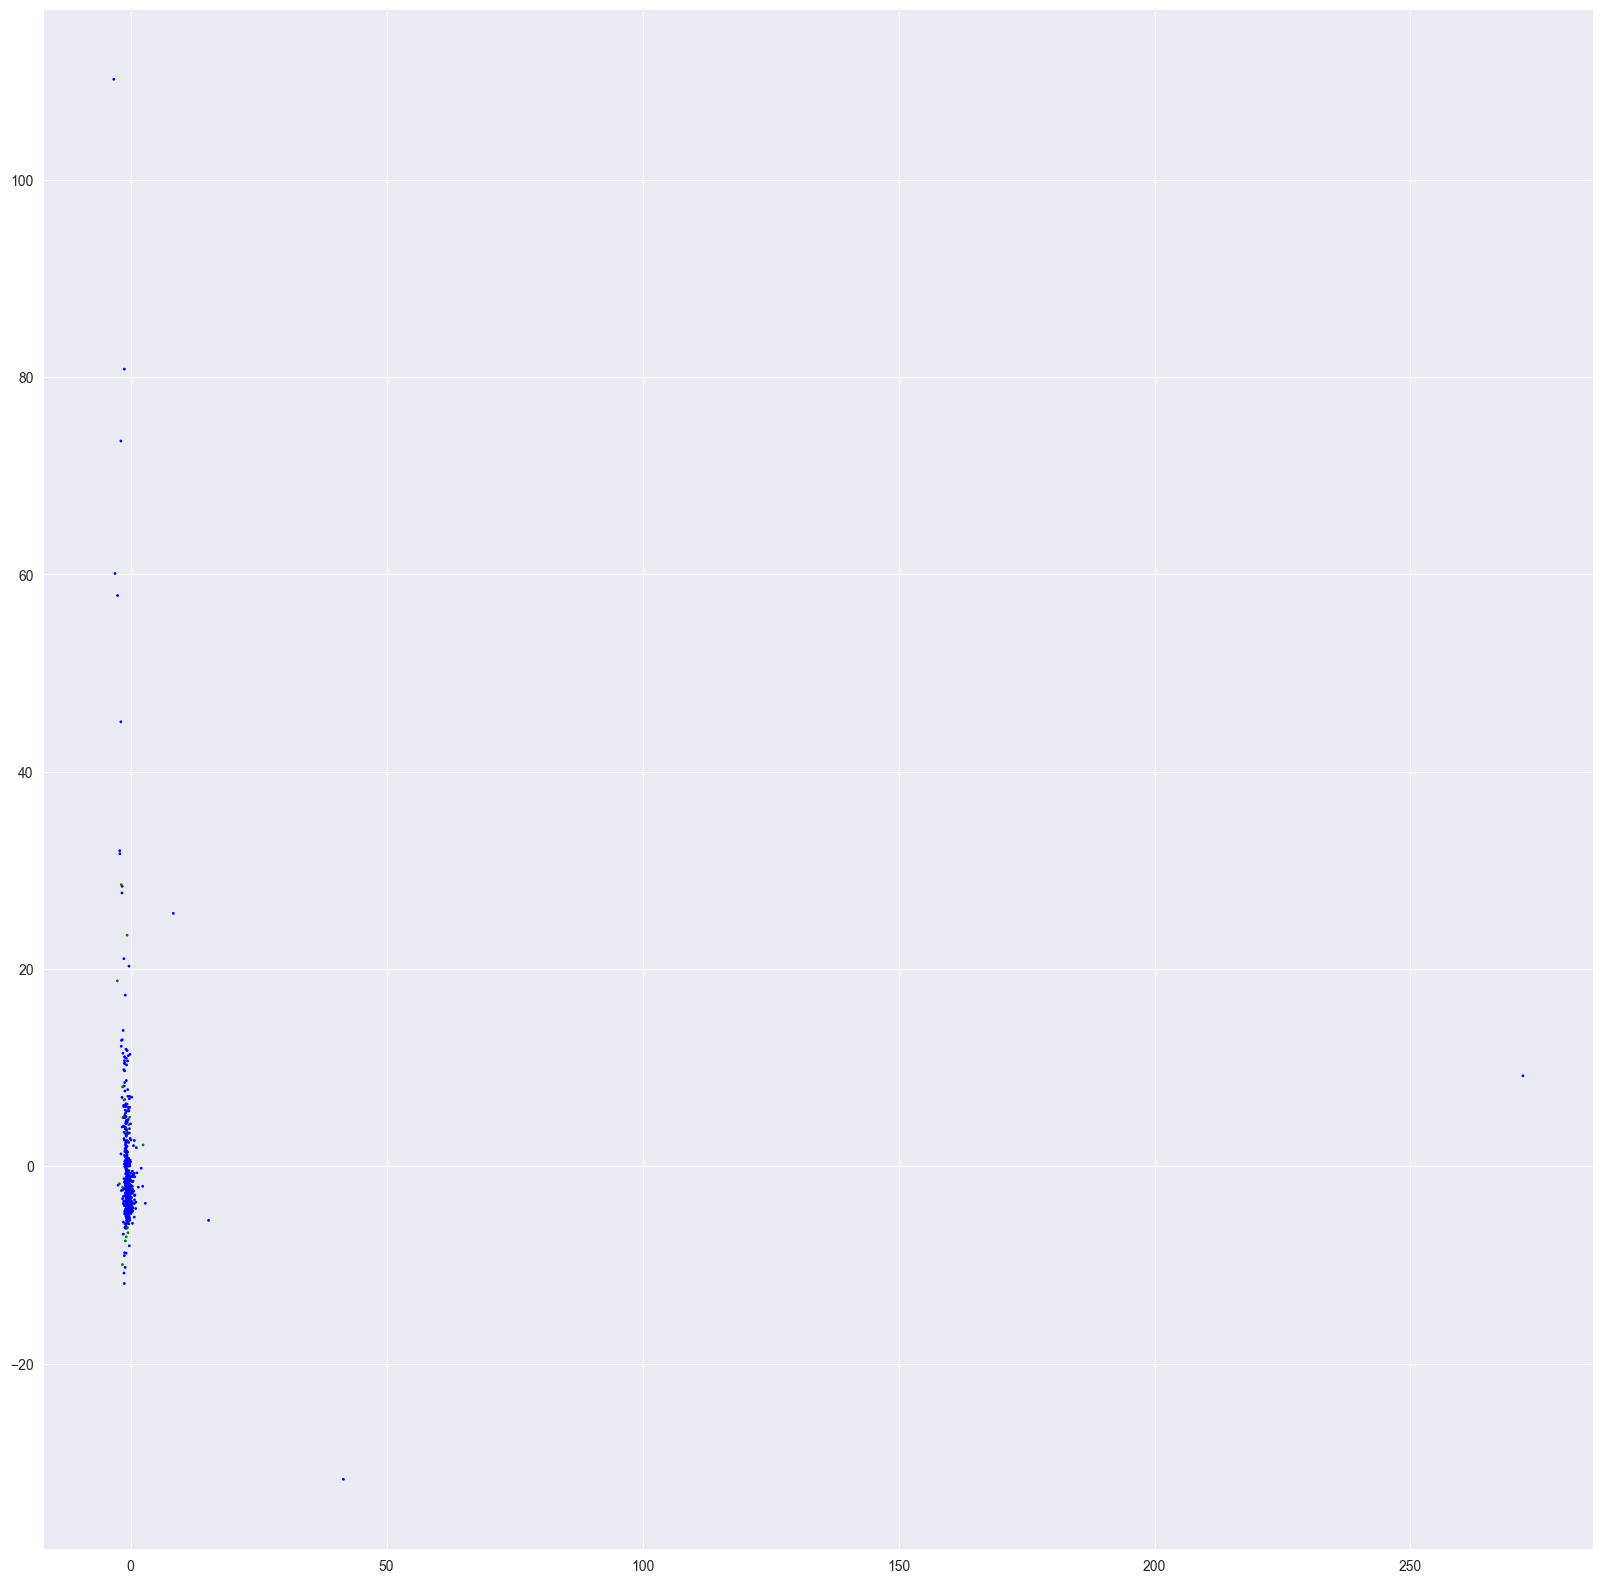

In [173]:
def plot_scatter(pc1, pc2, pc3):
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot()
    #xs = scores_df.iloc[:,0]
    #ys = scores_df.iloc[:,1]
    #n=scores_df.shape[1]
    # scaling x and y
    #scalex = 1.0/(xs.max()- xs.min())
    #scaley = 1.0/(ys.max()- ys.min())
    colors = {1:'green', 0:'blue'}
    ax.scatter(principalComponents[:, 0], principalComponents[:, 1], c=df['label'].map(colors), s=1)
    #plt.scatter(pc1, pc2, c = 'g')
    plt.show()

plot_scatter(V.iloc[:, indizes[0]], V.iloc[:, indizes[1]], V.iloc[:, indizes[2]])